In [1]:
# STEP 1: Upload the ZIP file
from google.colab import files
uploaded = files.upload()


Saving twitter_training.csv.zip to twitter_training.csv.zip


In [3]:
import pandas as pd

df = pd.read_csv("twitter_training.csv", encoding="utf-8")
print(df.columns)
df.head()


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
import pandas as pd

# Load without headers
df = pd.read_csv("twitter_training.csv", header=None, encoding='utf-8')

# Manually set column names (guessing from your data)
df.columns = ['tweet_id', 'entity', 'sentiment', 'tweet_text']

# Check the first rows again
print(df.head())


   tweet_id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                          tweet_text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


/tmp/ipython-input-5-2224330592.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


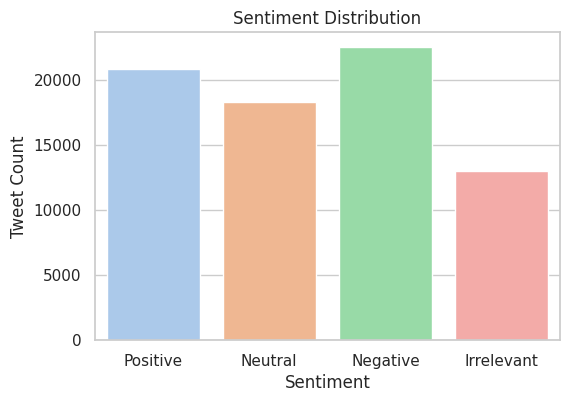

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Countplot for sentiment
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


/tmp/ipython-input-6-3888119076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_entities.values, y=top_entities.index, palette='Set2')


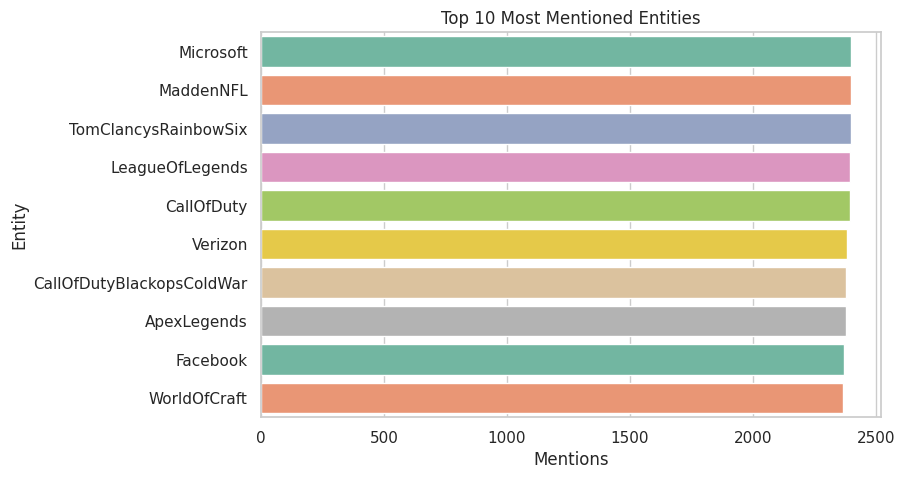

In [6]:
# Top 10 entities mentioned
top_entities = df['entity'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_entities.values, y=top_entities.index, palette='Set2')
plt.title("Top 10 Most Mentioned Entities")
plt.xlabel("Mentions")
plt.ylabel("Entity")
plt.show()



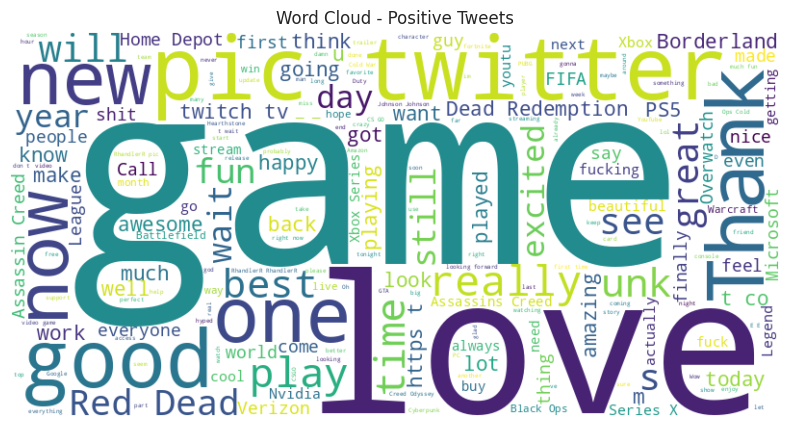

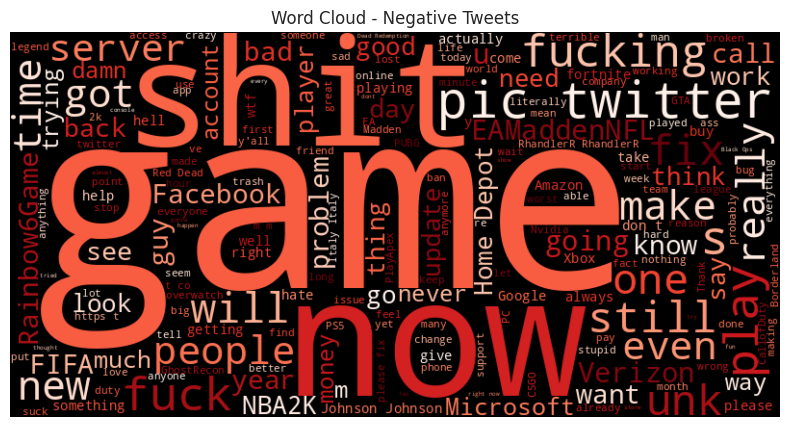

In [7]:
from wordcloud import WordCloud

# Join all tweet texts per sentiment
positive_text = " ".join(df[df['sentiment'] == 'Positive']['tweet_text'].astype(str))
negative_text = " ".join(df[df['sentiment'] == 'Negative']['tweet_text'].astype(str))

# WordCloud for Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Tweets")
plt.show()

# WordCloud for Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Tweets")
plt.show()


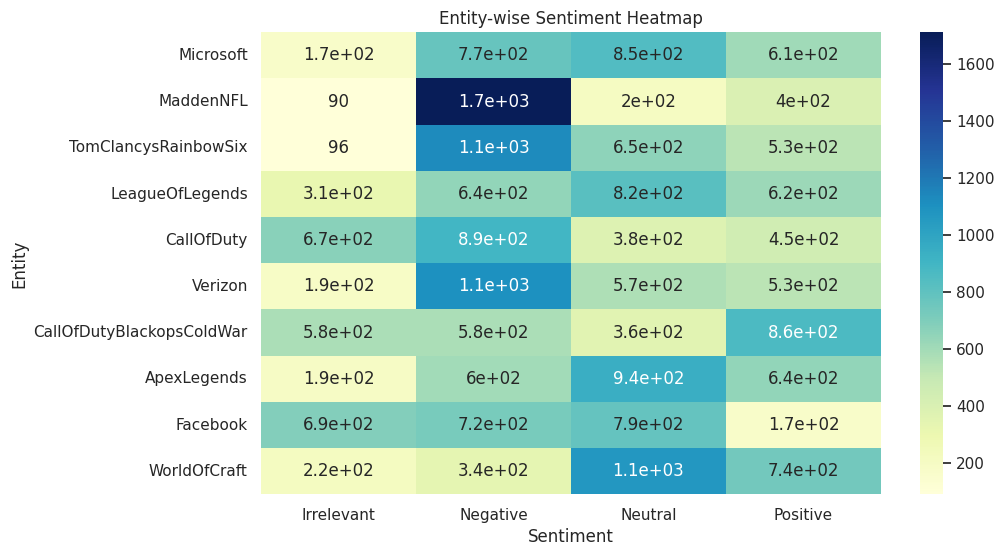

In [8]:
# Pivot table for heatmap
entity_sentiment = df.pivot_table(index='entity', columns='sentiment', aggfunc='size', fill_value=0)

# Show only top entities
top = df['entity'].value_counts().head(10).index
entity_sentiment = entity_sentiment.loc[top]

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(entity_sentiment, annot=True, cmap="YlGnBu")
plt.title("Entity-wise Sentiment Heatmap")
plt.ylabel("Entity")
plt.xlabel("Sentiment")
plt.show()
